In [ ]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/processed.cleveland.data")

In [ ]:
column_names = ["age", "sex", "chest_pain", "resting_bp", "cholesterol", "fasting_bs", "rest_ecg", "max_hr", "exercise_angina", "st_depression", "st_slope", "num_major_vessels", "thalassemia", "target"]
df.columns = column_names

In [ ]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values in Dataset:")
print(missing_values)

Missing Values in Dataset:
age                  0
sex                  0
chest_pain           0
resting_bp           0
cholesterol          0
fasting_bs           0
rest_ecg             0
max_hr               0
exercise_angina      0
st_depression        0
st_slope             0
num_major_vessels    0
thalassemia          0
target               0
dtype: int64


In [ ]:
df.shape

(296, 14)

In [ ]:
X = df.drop(columns=["target"])
y = df["target"]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df = df.apply(pd.to_numeric)

In [ ]:
df["sex"] = df["sex"].astype(int)
df["chest_pain"] = df["chest_pain"].astype(int)
df["fasting_bs"] = df["fasting_bs"].astype(int)
df["rest_ecg"] = df["rest_ecg"].astype(int)
df["exercise_angina"] = df["exercise_angina"].astype(int)
df["st_slope"] = df["st_slope"].astype(int)
df["num_major_vessels"] = df["num_major_vessels"].astype(int)
df["thalassemia"] = df["thalassemia"].astype(int)

df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

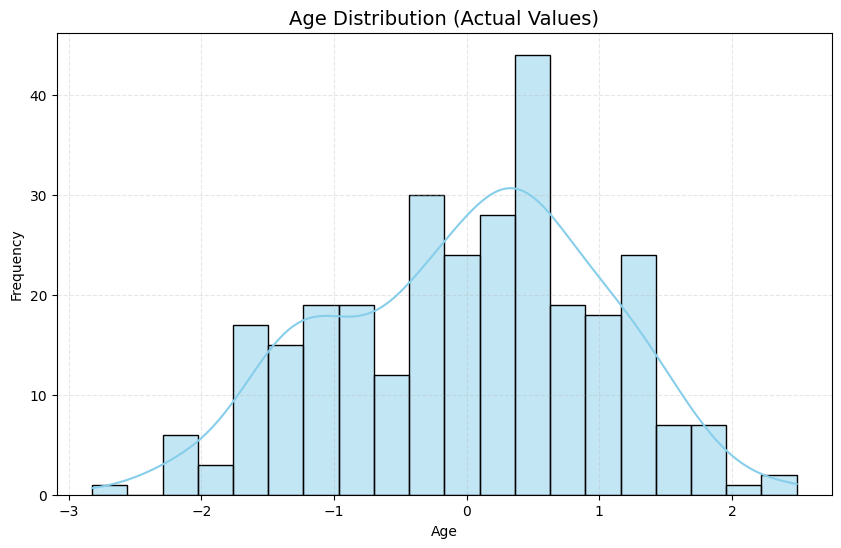

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'df' with your actual DataFrame name
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution (Actual Values)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


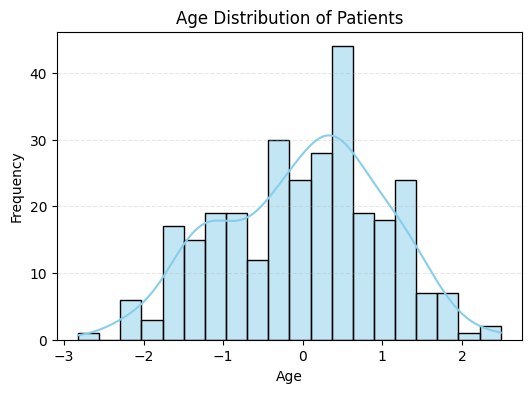

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


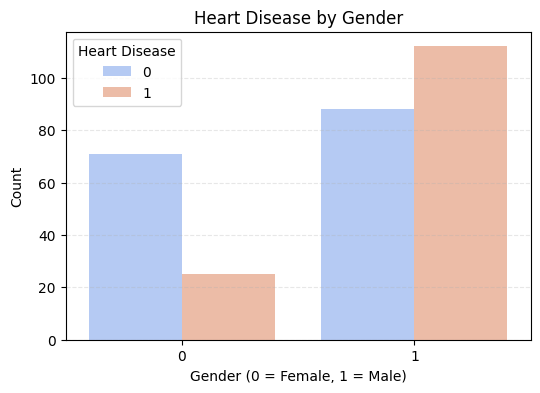

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df, palette='coolwarm')
plt.title('Heart Disease by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


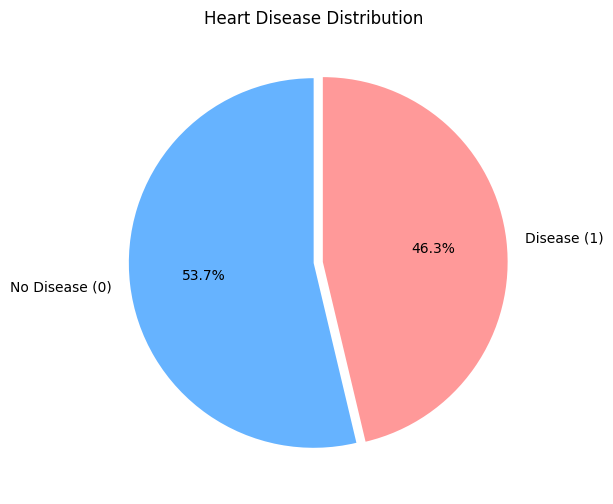

In [ ]:
labels = ['No Disease (0)', 'Disease (1)']
sizes = df['target'].value_counts()
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0,0.05])
plt.title('Heart Disease Distribution')
plt.show()


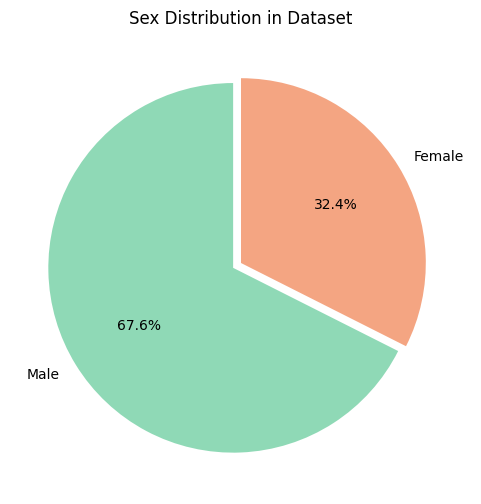

In [ ]:
labels = ['Male', 'Female']
sizes = df['sex'].value_counts()
colors = ['#8fd9b6', '#f4a582']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.05,0])
plt.title('Sex Distribution in Dataset')
plt.show()


In [ ]:

numerical_cols = ["age", "resting_bp", "cholesterol", "max_hr", "st_depression"]
categorical_cols = ["sex", "chest_pain", "fasting_bs", "rest_ecg", "exercise_angina", "st_slope", "num_major_vessels", "thalassemia"]

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:

X = df.drop(columns=["target"])
y = df["target"]

In [ ]:

le = LabelEncoder()
for col in ["sex", "chest_pain", "fasting_bs", "rest_ecg", "exercise_angina", "st_slope", "num_major_vessels", "thalassemia"]:
    X[col] = le.fit_transform(X[col])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<ipython-input-86-ba6999cca04b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


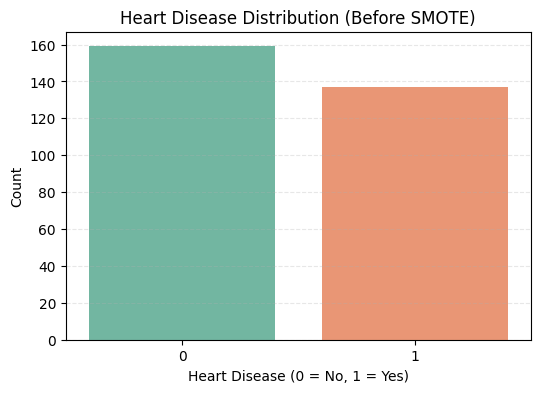

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Heart Disease Distribution (Before SMOTE)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


<ipython-input-87-674ff868f20a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_smote, palette='coolwarm')


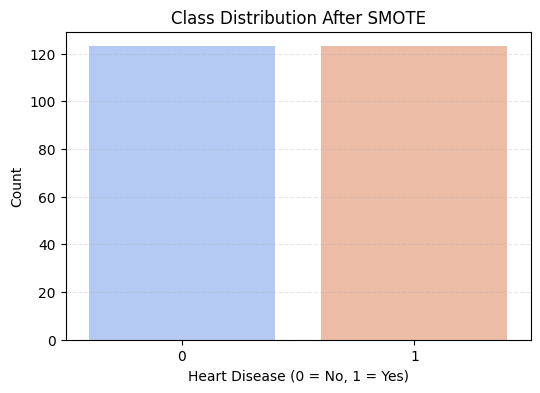

In [ ]:
import pandas as pd

# Create DataFrame from SMOTE output to use with seaborn
df_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
df_smote['target'] = y_train_smote

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df_smote, palette='coolwarm')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()



In [ ]:
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_smote, y_train_smote)
X_test_selected = selector.transform(X_test)
selected_mask = selector.get_support()
selected_features = X_train.columns[selected_mask]

print("Top 10 Selected Features:")
print(selected_features)

Top 10 Selected Features:
Index(['age', 'sex', 'chest_pain', 'resting_bp', 'max_hr', 'exercise_angina',
       'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Initialize ML Models
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
svm_model = SVC(probability=True, C=1.0, kernel='rbf', random_state=42)
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')

# Train ML Models
knn_model.fit(X_train_smote, y_train_smote)
svm_model.fit(X_train_smote, y_train_smote)
lr_model.fit(X_train_smote, y_train_smote)
rf_model.fit(X_train_smote, y_train_smote)
xgb_model.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:45:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.models import Sequential

timesteps = 1  # Assuming tabular data, adjust if using time-series
input_dim = X_train_smote.shape[1]

# Encoder
encoder = Sequential([
    LSTM(64, activation="relu", input_shape=(timesteps, input_dim), return_sequences=False),
    Dense(32, activation="relu")
])

# Decoder
decoder = Sequential([
    RepeatVector(timesteps),
    LSTM(64, activation="relu", return_sequences=True),
    TimeDistributed(Dense(input_dim, activation="linear"))
])

# Autoencoder Model
hrae_model = Sequential([encoder, decoder])
hrae_model.compile(optimizer="adam", loss="mse")

# Reshape input for LSTM (timesteps=1)
X_train_hrae = X_train_smote.values.reshape(-1, timesteps, input_dim)
X_test_hrae = X_test.values.reshape(-1, timesteps, input_dim)

# Train Autoencoder
hrae_model.fit(X_train_hrae, X_train_hrae, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Extract learned features (encoder output)
X_train_encoded = encoder.predict(X_train_hrae)
X_test_encoded = encoder.predict(X_test_hrae)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [ ]:
# Define LSTM Classifier
lstm_model = Sequential([
    LSTM(64, activation="relu", input_shape=(1, 32), return_sequences=True),
    LSTM(32, activation="relu", return_sequences=False),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

lstm_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the Classifier
lstm_model.fit(X_train_encoded.reshape(-1, 1, 32), y_train_smote, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Performance
loss, accuracy = lstm_model.evaluate(X_test_encoded.reshape(-1, 1, 32), y_test)
print(f"HRAE-LSTM Accuracy: {accuracy:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9458 - loss: 0.2677
HRAE-LSTM Accuracy: 0.9500


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 351ms/step
✅ Accuracy: 0.9500
✅ Precision: 0.9565
✅ Recall: 0.9167
✅ F1-Score: 0.9362


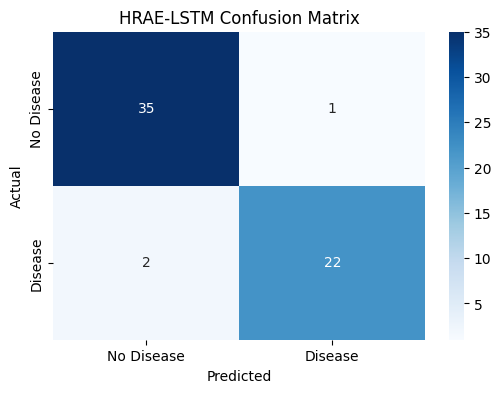

✅ ROC-AUC Score: 0.9456


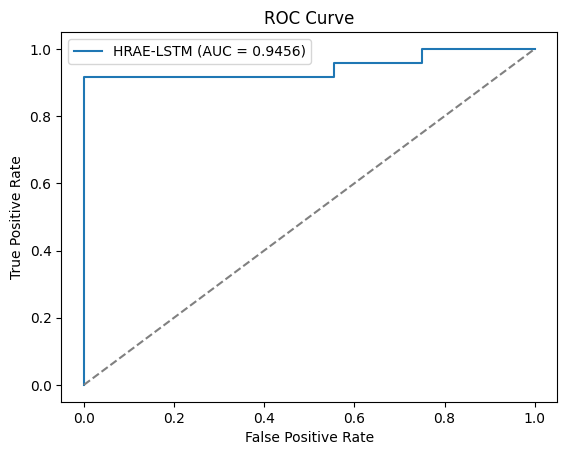

✅ Log Loss: 0.2595
✅ Matthews Correlation Coefficient (MCC): 0.8957


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, log_loss, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt

# Get Model Predictions
y_pred_probs = lstm_model.predict(X_test_encoded.reshape(-1, 1, 32))  # Probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to 0/1

# 🔹 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

# 🔹 2. Precision
precision = precision_score(y_test, y_pred)
print(f"✅ Precision: {precision:.4f}")

# 🔹 3. Recall
recall = recall_score(y_test, y_pred)
print(f"✅ Recall: {recall:.4f}")

# 🔹 4. F1-Score
f1 = f1_score(y_test, y_pred)
print(f"✅ F1-Score: {f1:.4f}")

# 🔹 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HRAE-LSTM Confusion Matrix")
plt.show()

# 🔹 6. ROC-AUC Score
auc = roc_auc_score(y_test, y_pred_probs)
print(f"✅ ROC-AUC Score: {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, label=f"HRAE-LSTM (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 🔹 7. Log Loss
logloss = log_loss(y_test, y_pred_probs)
print(f"✅ Log Loss: {logloss:.4f}")

# 🔹 8. Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)
print(f"✅ Matthews Correlation Coefficient (MCC): {mcc:.4f}")


In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape, BatchNormalization

In [ ]:
df.shape


(296, 14)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')
svm_model = SVC(probability=True, C=1.0, kernel='rbf', random_state=42)
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')

knn_model.fit(X_train_smote, y_train_smote)
svm_model.fit(X_train_smote, y_train_smote)
lr_model.fit(X_train_smote, y_train_smote)
rf_model.fit(X_train_smote, y_train_smote)
xgb_model.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:47:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input, RepeatVector, TimeDistributed

In [ ]:
from tensorflow.keras.models import Sequential, Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam


In [ ]:
proba_knn = knn_model.predict_proba(X_test)[:, 1]
proba_svm = svm_model.predict_proba(X_test)[:, 1]
proba_lr = lr_model.predict_proba(X_test)[:, 1]
proba_rf = rf_model.predict_proba(X_test)[:, 1]
proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
proba_lstm = lstm_model.predict(X_test_encoded.reshape(-1, 1, 32)).flatten()

# -------------------------
# 2️⃣ Stack Predictions
# -------------------------
stacked_input = np.column_stack([
    proba_knn,
    proba_svm,
    proba_lr,
    proba_rf,
    proba_xgb,
    proba_lstm
])

# -------------------------
# 3️⃣ Train Meta-Classifier
# -------------------------
meta_model = LogisticRegression()
meta_model.fit(stacked_input, y_test)  # (in practice, use a validation set)

# -------------------------
# 4️⃣ Final Stacked Prediction
# -------------------------
stacked_pred = meta_model.predict(stacked_input)
stacked_proba = meta_model.predict_proba(stacked_input)[:, 1]

# -------------------------
# 5️⃣ Evaluation Metrics
# -------------------------
print("🔝 Stacked Ensemble Metrics:")
print(f"Accuracy  : {accuracy_score(y_test, stacked_pred):.4f}")
print(f"Precision : {precision_score(y_test, stacked_pred):.4f}")
print(f"Recall    : {recall_score(y_test, stacked_pred):.4f}")
print(f"F1-Score  : {f1_score(y_test, stacked_pred):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, stacked_proba):.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
🔝 Stacked Ensemble Metrics:
Accuracy  : 0.9333
Precision : 0.9545
Recall    : 0.8750
F1-Score  : 0.9130
ROC-AUC   : 0.9618


In [ ]:
proba_lstm = lstm_model.predict(X_test_encoded.reshape(-1, 1, 32)).flatten()
pred_lstm = (proba_lstm >= 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack_model = StackingClassifier(
    estimators=[
        ('knn', knn_model),
        ('svm', svm_model),
        ('lr', lr_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)
stack_model.fit(X_train_smote, y_train_smote)
ensemble_final = stack_model.predict(X_test)
proba_ensemble = stack_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:48:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:48:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
preds_dict = {
    "KNN": knn_model.predict(X_test),
    "SVM": svm_model.predict(X_test),
    "Logistic Regression": lr_model.predict(X_test),
    "Random Forest": rf_model.predict(X_test),
    "XGBoost": xgb_model.predict(X_test),
    "HRAE-LSTM": pred_lstm,
    "Stacking Ensemble": ensemble_final
}

proba_dict = {
    "KNN": knn_model.predict_proba(X_test)[:, 1],
    "SVM": svm_model.predict_proba(X_test)[:, 1],
    "Logistic Regression": lr_model.predict_proba(X_test)[:, 1],
    "Random Forest": rf_model.predict_proba(X_test)[:, 1],
    "XGBoost": xgb_model.predict_proba(X_test)[:, 1],
    "HRAE-LSTM": proba_lstm,
    "Stacking Ensemble": proba_ensemble
}

# ========== Metric Storage ==========
accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores = {}, {}, {}, {}, {}

# ========== Calculate Metrics ==========
for model, y_pred in preds_dict.items():
    y_prob = proba_dict[model]
    accuracy_scores[model] = accuracy_score(y_test, y_pred)
    precision_scores[model] = precision_score(y_test, y_pred)
    recall_scores[model] = recall_score(y_test, y_pred)
    f1_scores[model] = f1_score(y_test, y_pred)
    roc_auc_scores[model] = roc_auc_score(y_test, y_prob)

# ========== Print Metrics ==========
print("📊 Model Metrics:\n")
for model in preds_dict.keys():
    print(f"{model}:\n"
          f"  Accuracy:  {accuracy_scores[model]:.4f}\n"
          f"  Precision: {precision_scores[model]:.4f}\n"
          f"  Recall:    {recall_scores[model]:.4f}\n"
          f"  F1-Score:  {f1_scores[model]:.4f}\n"
          f"  ROC-AUC:   {roc_auc_scores[model]:.4f}\n")

📊 Model Metrics:

KNN:
  Accuracy:  0.9333
  Precision: 0.9167
  Recall:    0.9167
  F1-Score:  0.9167
  ROC-AUC:   0.9664

SVM:
  Accuracy:  0.9000
  Precision: 0.8750
  Recall:    0.8750
  F1-Score:  0.8750
  ROC-AUC:   0.9502

Logistic Regression:
  Accuracy:  0.9167
  Precision: 0.9524
  Recall:    0.8333
  F1-Score:  0.8889
  ROC-AUC:   0.9468

Random Forest:
  Accuracy:  0.8667
  Precision: 0.8636
  Recall:    0.7917
  F1-Score:  0.8261
  ROC-AUC:   0.9213

XGBoost:
  Accuracy:  0.8333
  Precision: 0.7692
  Recall:    0.8333
  F1-Score:  0.8000
  ROC-AUC:   0.9144

HRAE-LSTM:
  Accuracy:  0.9500
  Precision: 0.9565
  Recall:    0.9167
  F1-Score:  0.9362
  ROC-AUC:   0.9456

Stacking Ensemble:
  Accuracy:  0.9167
  Precision: 0.9524
  Recall:    0.8333
  F1-Score:  0.8889
  ROC-AUC:   0.9502



In [ ]:
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=X_train_smote.shape[1], activation='relu'))  # Input layer + hidden layer
mlp_model.add(Dense(32, activation='relu'))  # Hidden layer
mlp_model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype("int32")
print("MLP Model Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.4829 - loss: 0.7179 - val_accuracy: 0.6600 - val_loss: 0.6502
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6600 - loss: 0.6408 - val_accuracy: 0.8000 - val_loss: 0.5772
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7542 - loss: 0.5894 - val_accuracy: 0.8000 - val_loss: 0.5343
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7601 - loss: 0.5550 - val_accuracy: 0.8000 - val_loss: 0.5033
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7564 - loss: 0.5240 - val_accuracy: 0.8000 - val_loss: 0.4813
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7797 - loss: 0.5072 - val_accuracy: 0.7600 - val_loss: 0.4723
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8320 - loss: 0.4560 - val_accuracy: 0.7800 - val_loss: 0.4626
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8083 - loss: 0.4544 - val_accuracy: 0.7800 - val_loss: 0.4464
Epoch 9/20


In [ ]:
# Assuming MLP is already trained, predictions and probabilities are as follows:

# Make predictions for MLP
mlp_preds = (mlp_model.predict(X_test) > 0.5).astype("int32")
mlp_proba = mlp_model.predict(X_test)[:, 0]  # Get the probability for the positive class

# Add MLP to predictions and probabilities dictionaries
preds_dict["MLP"] = mlp_preds
proba_dict["MLP"] = mlp_proba

# ========== Metric Storage ==========
accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores = {}, {}, {}, {}, {}

# ========== Calculate Metrics ==========
for model, y_pred in preds_dict.items():
    y_prob = proba_dict[model]
    accuracy_scores[model] = accuracy_score(y_test, y_pred)
    precision_scores[model] = precision_score(y_test, y_pred)
    recall_scores[model] = recall_score(y_test, y_pred)
    f1_scores[model] = f1_score(y_test, y_pred)
    roc_auc_scores[model] = roc_auc_score(y_test, y_prob)

# ========== Print Metrics ==========
print("📊 Model Metrics:\n")
for model in preds_dict.keys():
    print(f"{model}:\n"
          f"  Accuracy:  {accuracy_scores[model]:.4f}\n"
          f"  Precision: {precision_scores[model]:.4f}\n"
          f"  Recall:    {recall_scores[model]:.4f}\n"
          f"  F1-Score:  {f1_scores[model]:.4f}\n"
          f"  ROC-AUC:   {roc_auc_scores[model]:.4f}\n")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
📊 Model Metrics:

KNN:
  Accuracy:  0.9333
  Precision: 0.9167
  Recall:    0.9167
  F1-Score:  0.9167
  ROC-AUC:   0.9664

SVM:
  Accuracy:  0.9000
  Precision: 0.8750
  Recall:    0.8750
  F1-Score:  0.8750
  ROC-AUC:   0.9502

Logistic Regression:
  Accuracy:  0.9167
  Precision: 0.9524
  Recall:    0.8333
  F1-Score:  0.8889
  ROC-AUC:   0.9468

Random Forest:
  Accuracy:  0.8667
  Precision: 0.8636
  Recall:    0.7917
  F1-Score:  0.8261
  ROC-AUC:   0.9213

XGBoost:
  Accuracy:  0.8333
  Precision: 0.7692
  Recall:    0.8333
  F1-Score:  0.8000
  ROC-AUC:   0.9144

HRAE-LSTM:
  Accuracy:  0.9500
  Precision: 0.9565
  Recall:    0.9167
  F1-Score:  0.9362
  ROC-AUC:   0.9456

Stacking Ensemble:
  Accuracy:  0.9167
  Precision: 0.9524
  Recall:    0.8333
  F1-Score:  0.8889
  ROC-AUC:   0.9502

MLP:
  Accuracy:  0.9333
  Precision: 0.9545
  Recall:    0.8750
  F1-Score:  0.9130
  ROC-AUC:   0.9213



<ipython-input-119-3b2d30f22297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metric_dict.keys()), y=list(metric_dict.values()), palette=color)
<ipython-input-119-3b2d30f22297>:8: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


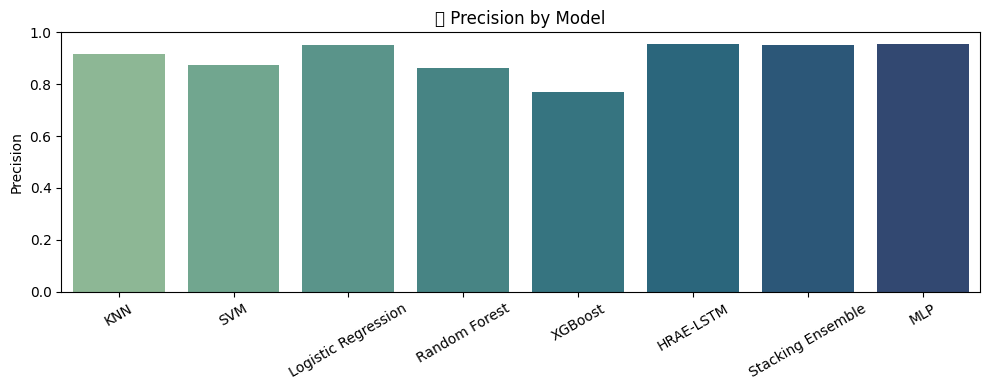

<ipython-input-119-3b2d30f22297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metric_dict.keys()), y=list(metric_dict.values()), palette=color)
<ipython-input-119-3b2d30f22297>:8: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


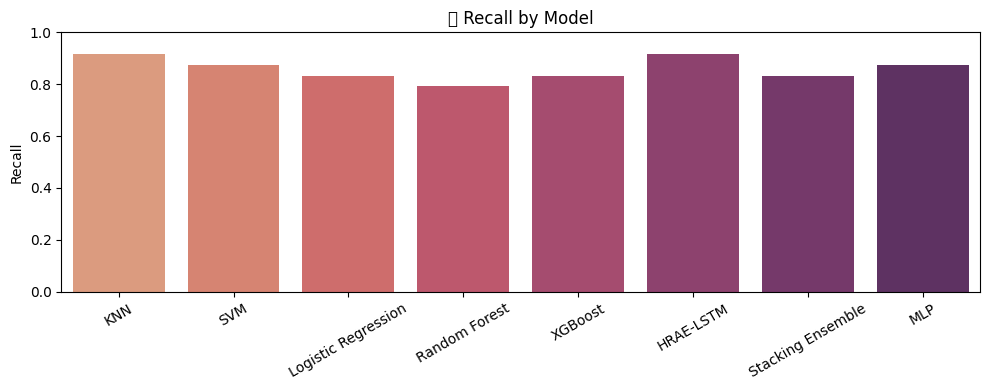

<ipython-input-119-3b2d30f22297>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metric_dict.keys()), y=list(metric_dict.values()), palette=color)
<ipython-input-119-3b2d30f22297>:8: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


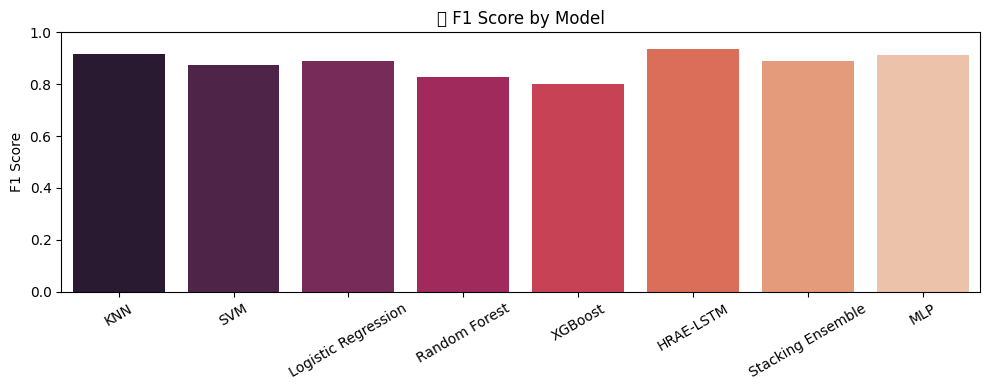

In [ ]:
def plot_metric(metric_dict, title, ylabel, color):
    plt.figure(figsize=(10, 4))
    sns.barplot(x=list(metric_dict.keys()), y=list(metric_dict.values()), palette=color)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=30)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

plot_metric(precision_scores, "🔍 Precision by Model", "Precision", "crest")
plot_metric(recall_scores, "📈 Recall by Model", "Recall", "flare")
plot_metric(f1_scores, "🧮 F1 Score by Model", "F1 Score", "rocket")

<ipython-input-120-d1556280bb44>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ml_accuracies.keys()), y=list(ml_accuracies.values()), palette="Blues_d")
<ipython-input-120-d1556280bb44>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


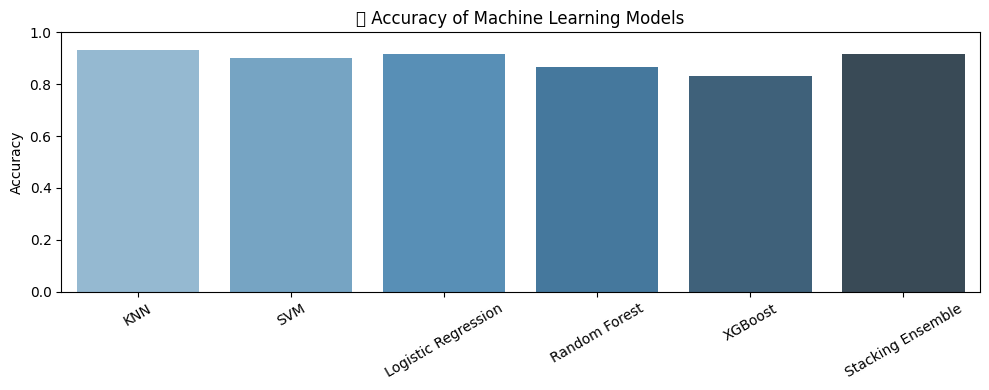

<ipython-input-120-d1556280bb44>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(dl_accuracies.keys()), y=list(dl_accuracies.values()), palette="Oranges_d")
<ipython-input-120-d1556280bb44>:27: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


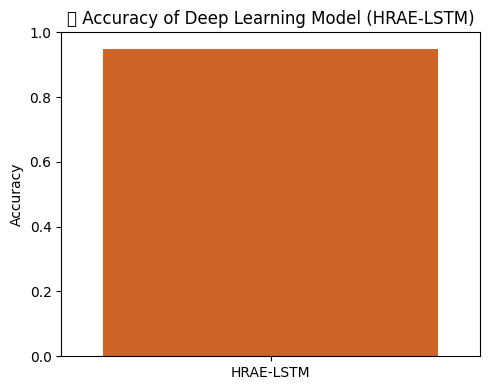

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split ML and DL accuracy
ml_models = ["KNN", "SVM", "Logistic Regression", "Random Forest", "XGBoost", "Stacking Ensemble"]
dl_models = ["HRAE-LSTM"]

ml_accuracies = {model: accuracy_scores[model] for model in ml_models}
dl_accuracies = {model: accuracy_scores[model] for model in dl_models}

# Plot ML Models Accuracy
plt.figure(figsize=(10, 4))
sns.barplot(x=list(ml_accuracies.keys()), y=list(ml_accuracies.values()), palette="Blues_d")
plt.title("📊 Accuracy of Machine Learning Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot DL Model Accuracy
plt.figure(figsize=(5, 4))
sns.barplot(x=list(dl_accuracies.keys()), y=list(dl_accuracies.values()), palette="Oranges_d")
plt.title("🤖 Accuracy of Deep Learning Model (HRAE-LSTM)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


<ipython-input-121-fbe7f2615d54>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ml_accuracies.keys()), y=list(ml_accuracies.values()), palette="Blues_d")
<ipython-input-121-fbe7f2615d54>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


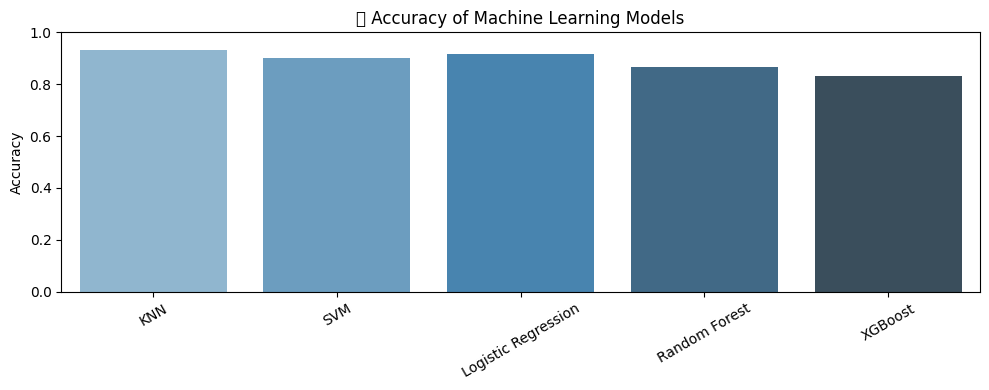

<ipython-input-121-fbe7f2615d54>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(dl_accuracies.keys()), y=list(dl_accuracies.values()), palette="Oranges_d")
<ipython-input-121-fbe7f2615d54>:29: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


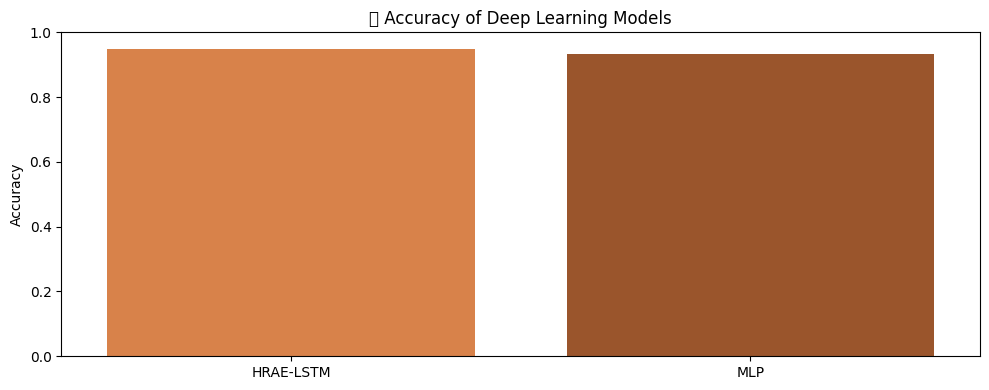

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split ML and DL accuracy (Removed Stacking Ensemble from ML)
ml_models = ["KNN", "SVM", "Logistic Regression", "Random Forest", "XGBoost"]
dl_models = ["HRAE-LSTM", "MLP"]  # MLP remains in DL models

# Get accuracies for ML models
ml_accuracies = {model: accuracy_scores[model] for model in ml_models}
# Get accuracies for DL models
dl_accuracies = {model: accuracy_scores[model] for model in dl_models}

# Plot ML Models Accuracy
plt.figure(figsize=(10, 4))
sns.barplot(x=list(ml_accuracies.keys()), y=list(ml_accuracies.values()), palette="Blues_d")
plt.title("📊 Accuracy of Machine Learning Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Plot DL Models Accuracy (HRAE-LSTM and MLP)
plt.figure(figsize=(10, 4))
sns.barplot(x=list(dl_accuracies.keys()), y=list(dl_accuracies.values()), palette="Oranges_d")
plt.title("🤖 Accuracy of Deep Learning Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


<ipython-input-55-6ccecc0e6dc2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(data_dict.keys()), y=list(data_dict.values()), palette=color)
<ipython-input-55-6ccecc0e6dc2>:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


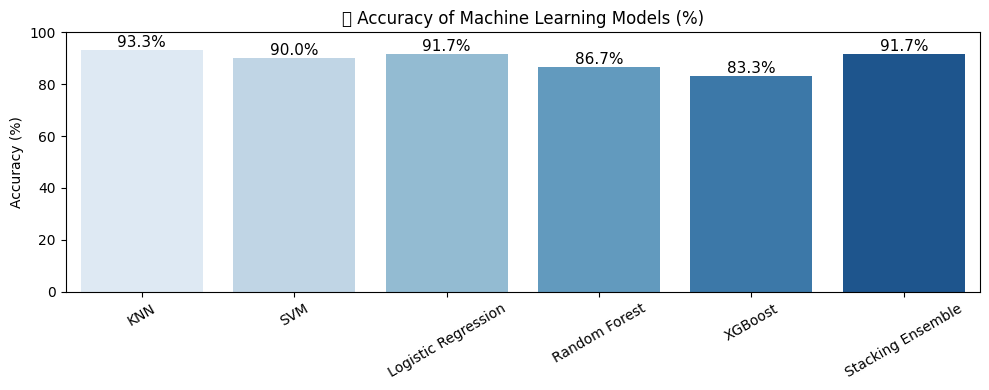

<ipython-input-55-6ccecc0e6dc2>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(data_dict.keys()), y=list(data_dict.values()), palette=color)
<ipython-input-55-6ccecc0e6dc2>:23: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


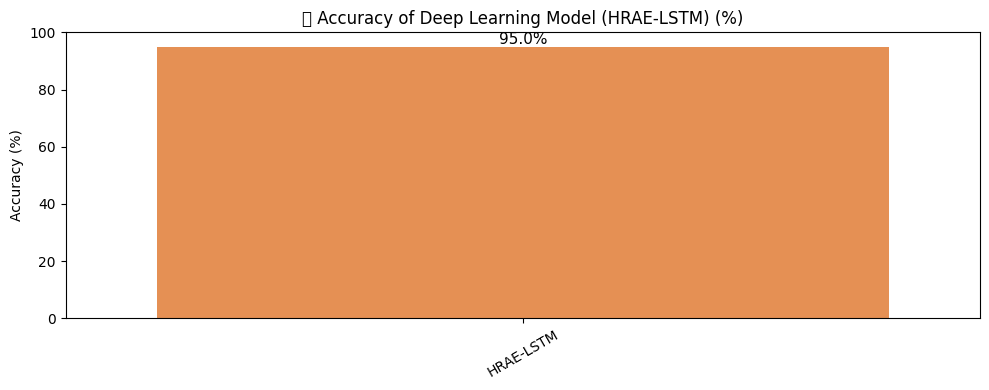

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert accuracy to percentage
ml_models = ["KNN", "SVM", "Logistic Regression", "Random Forest", "XGBoost", "Stacking Ensemble"]
dl_models = ["HRAE-LSTM"]

ml_accuracies = {model: accuracy_scores[model] * 100 for model in ml_models}
dl_accuracies = {model: accuracy_scores[model] * 100 for model in dl_models}

# Function to plot with % labels
def plot_accuracy_bar(data_dict, title, color):
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=list(data_dict.keys()), y=list(data_dict.values()), palette=color)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=11, color='black')
    plt.title(title)
    plt.ylabel("Accuracy (%)")
    plt.ylim(0, 100)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

# 📊 Plot ML Accuracy
plot_accuracy_bar(ml_accuracies, "📊 Accuracy of Machine Learning Models (%)", "Blues")

# 🤖 Plot DL Accuracy
plot_accuracy_bar(dl_accuracies, "🤖 Accuracy of Deep Learning Model (HRAE-LSTM) (%)", "Oranges")


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base learners
base_learners = [
    ('knn', knn_model),
    ('svm', svm_model),
    ('lr', lr_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
]

# Meta-model (Logistic Regression is common)
meta_model = LogisticRegression()

# Define stacking model
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# Train stacking model
stacking_model.fit(X_train_smote, y_train_smote)

# Predict
pred_ensemble = stacking_model.predict(X_test)
prob_ensemble = stacking_model.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


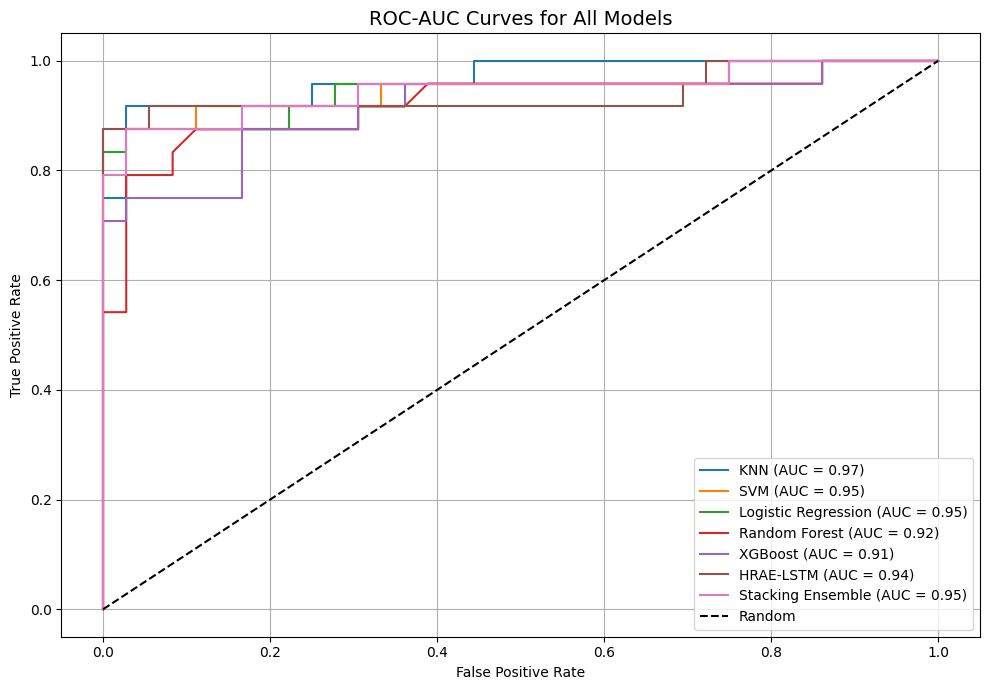

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Dictionary of model probabilities and names
models_proba = {
    "KNN": prob_knn,
    "SVM": prob_svm,
    "Logistic Regression": prob_lr,
    "Random Forest": prob_rf,
    "XGBoost": prob_xgb,
    "HRAE-LSTM": prob_lstm,
    "Stacking Ensemble": prob_ensemble
}

plt.figure(figsize=(10, 7))
for name, proba in models_proba.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Plot aesthetics
plt.title("ROC-AUC Curves for All Models", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Example metric values (update with your actual values)
model_names = ["KNN", "SVM", "LogReg", "RF", "XGBoost", "HRAE-LSTM", "Stacking"]

accuracies =   [0.9333, 0.9000, 0.9167, 0.8667, 0.8333, 0.9333, 0.9167]
precisions =  [0.9167, 0.8750, 0.9524, 0.8636, 0.7692, 0.9545, 0.9524]
recalls =     [0.9167, 0.8750, 0.8333, 0.7917, 0.8333, 0.8750, 0.8333]
f1_scores =   [0.9167, 0.8750, 0.8889, 0.8261, 0.8000, 0.9130, 0.8889]


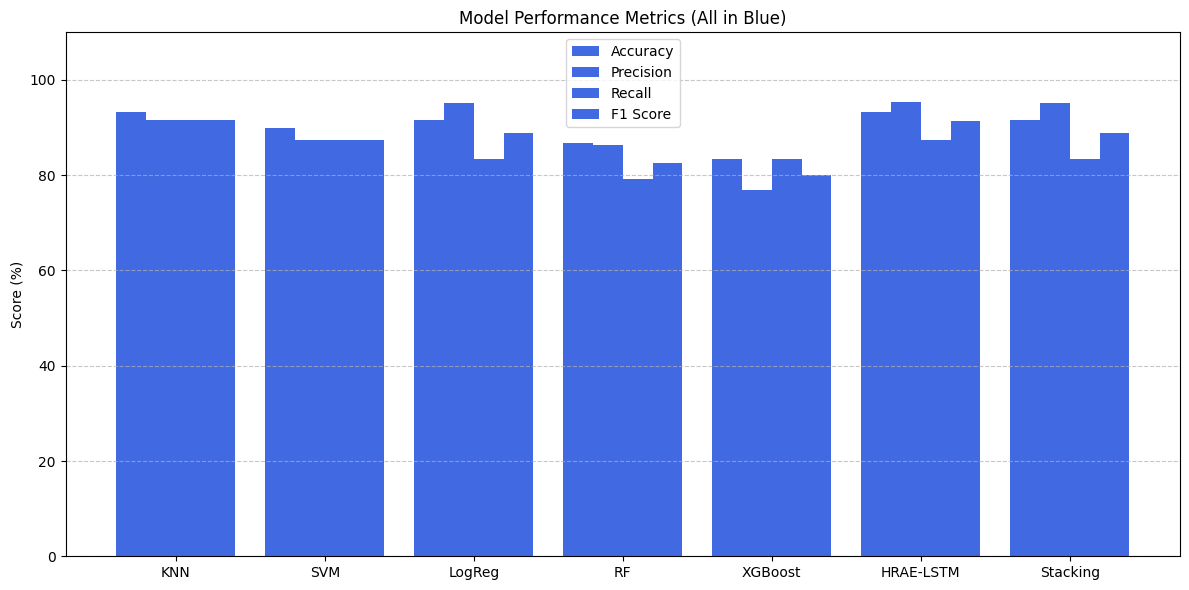

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to percentages
accuracies = [a * 100 for a in accuracies]
precisions = [p * 100 for p in precisions]
recalls = [r * 100 for r in recalls]
f1_scores = [f * 100 for f in f1_scores]

x = np.arange(len(model_names))
width = 0.2  # Bar width

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracies, width, label='Accuracy', color='royalblue')
plt.bar(x - 0.5*width, precisions, width, label='Precision', color='royalblue')
plt.bar(x + 0.5*width, recalls, width, label='Recall', color='royalblue')
plt.bar(x + 1.5*width, f1_scores, width, label='F1 Score', color='royalblue')

plt.ylabel('Score (%)')
plt.title('Model Performance Metrics (All in Blue)')
plt.xticks(x, model_names)
plt.ylim(0, 110)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-131-770a939d9573>:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


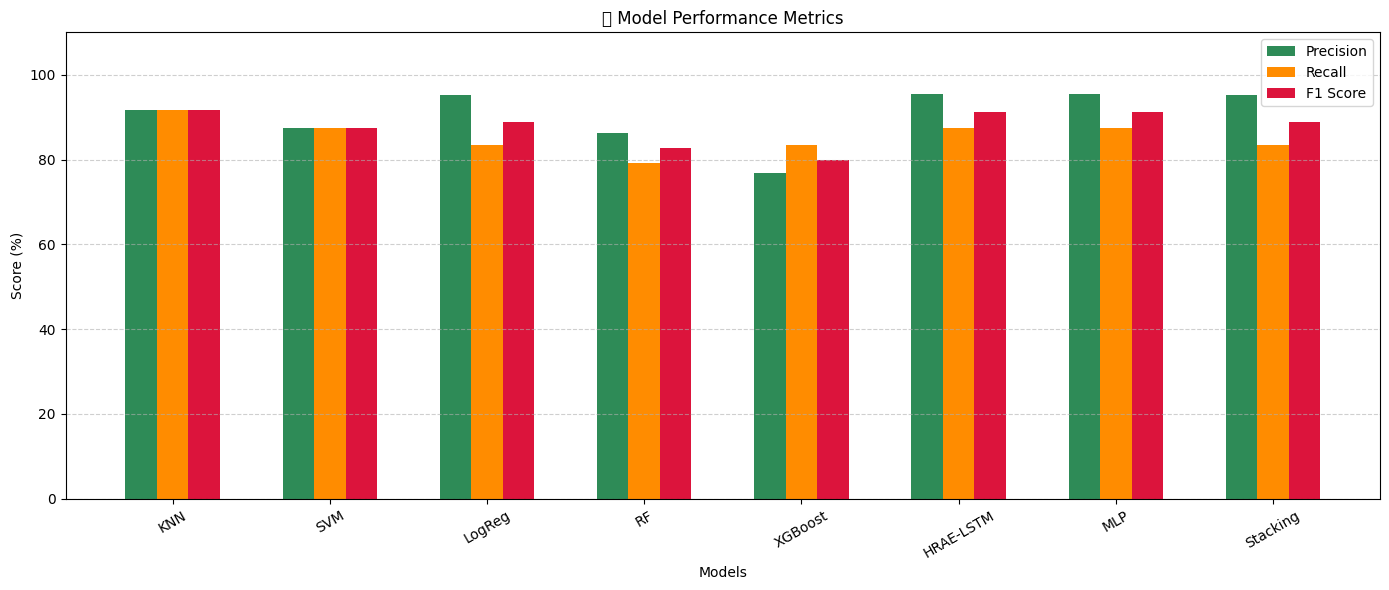

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ✅ Model Names (including Stacking)
model_names = ["KNN", "SVM", "LogReg", "RF", "XGBoost", "HRAE-LSTM", "MLP", "Stacking"]

# ✅ Corresponding metric values (in percentage)
precisions =  [91.67, 87.50, 95.24, 86.36, 76.92, 95.45, 95.45, 95.24]
recalls =     [91.67, 87.50, 83.33, 79.17, 83.33, 87.50, 87.50, 83.33]
f1_scores =   [91.67, 87.50, 88.89, 82.61, 80.00, 91.30, 91.30, 88.89]

# Set positions
x = np.arange(len(model_names))
width = 0.2

# Plot
plt.figure(figsize=(14, 6))

plt.bar(x - width, precisions, width, label='Precision', color='seagreen')
plt.bar(x, recalls, width, label='Recall', color='darkorange')
plt.bar(x + width, f1_scores, width, label='F1 Score', color='crimson')

# Aesthetics
plt.xlabel("Models")
plt.ylabel("Score (%)")
plt.title("📊 Model Performance Metrics")
plt.xticks(x, model_names, rotation=30)
plt.ylim(0, 110)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




<ipython-input-126-a0896cb79911>:35: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


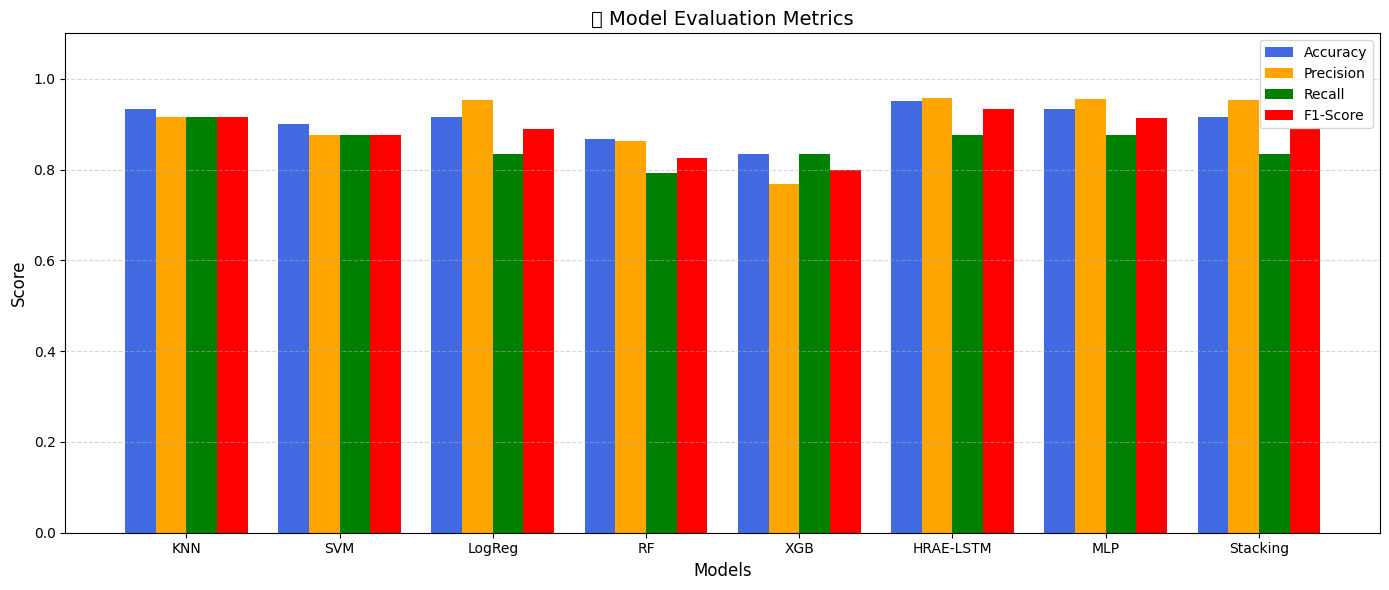

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model Names (🛠️ Fixed missing comma)
models = ['KNN', 'SVM', 'LogReg', 'RF', 'XGB', 'HRAE-LSTM', 'MLP', 'Stacking']

# Metrics: Fill with your final values
accuracy =  [0.9333, 0.9000, 0.9167, 0.8667, 0.8333, 0.9500, 0.9333, 0.9167]
precision = [0.9167, 0.8750, 0.9524, 0.8636, 0.7692, 0.9565, 0.9545, 0.9524]
recall =    [0.9167, 0.8750, 0.8333, 0.7917, 0.8333, 0.8750, 0.8750, 0.8333]
f1_score =  [0.9167, 0.8750, 0.8889, 0.8261, 0.8000, 0.9333, 0.9130, 0.8889]

# Bar Width and Positioning
bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plot
plt.figure(figsize=(14, 6))
plt.bar(r1, accuracy, width=bar_width, color='royalblue', label='Accuracy')
plt.bar(r2, precision, width=bar_width, color='orange', label='Precision')
plt.bar(r3, recall, width=bar_width, color='green', label='Recall')
plt.bar(r4, f1_score, width=bar_width, color='red', label='F1-Score')

# Labels and Legend
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('📊 Model Evaluation Metrics', fontsize=14)
plt.xticks([r + bar_width * 1.5 for r in range(len(models))], models)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



<ipython-input-127-e7f0db12af40>:25: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


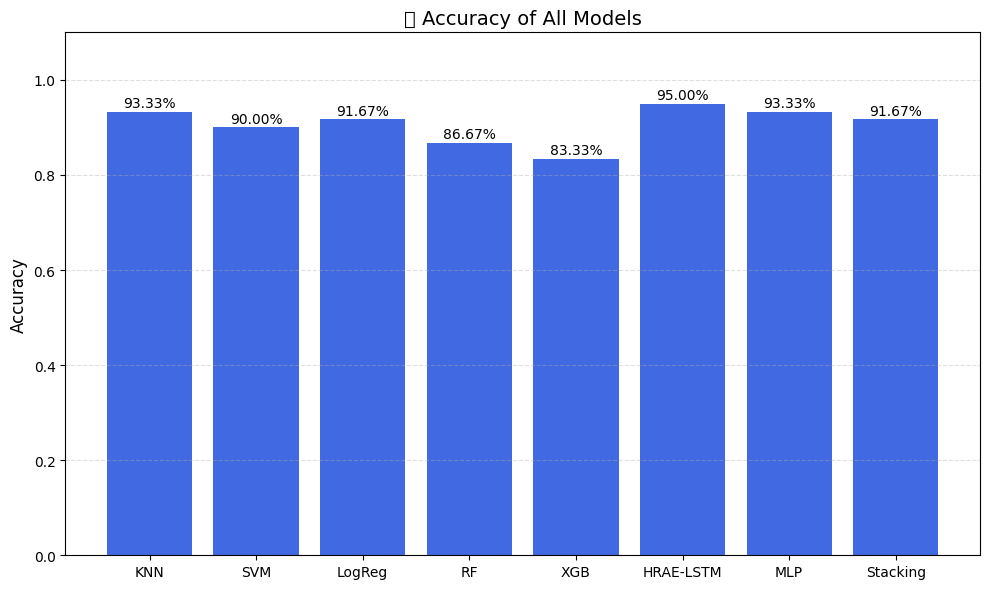

In [ ]:
import matplotlib.pyplot as plt

# Model Names
models = ['KNN', 'SVM', 'LogReg', 'RF', 'XGB', 'HRAE-LSTM', 'MLP','Stacking']

# Accuracy Values (use your final values here)
accuracy = [0.9333, 0.9000, 0.9167, 0.8667, 0.8333, 0.9500,0.9333, 0.9167]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy, color='royalblue')

# Annotate bar heights
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2%}', ha='center', fontsize=10)

# Labels and Title
plt.ylim(0, 1.1)
plt.ylabel('Accuracy', fontsize=12)
plt.title('📈 Accuracy of All Models', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


<ipython-input-74-a1b52dd5de0d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


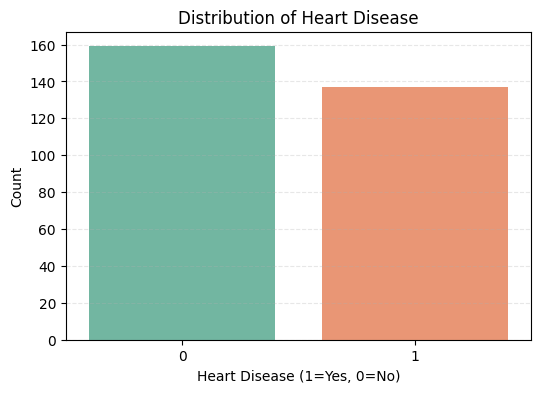

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1=Yes, 0=No)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


<ipython-input-38-835dad79e5c6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


NameError: name 'y_resampled' is not defined

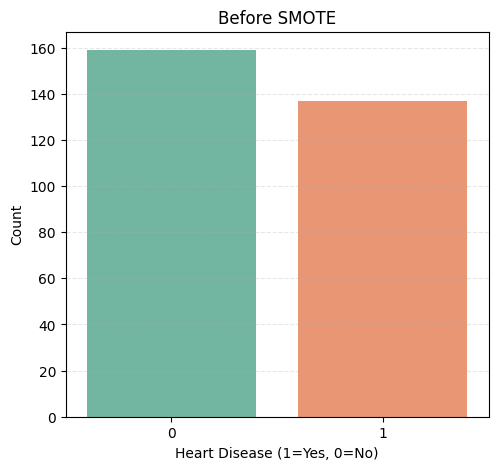

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Before SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Before SMOTE')
plt.xlabel('Heart Disease (1=Yes, 0=No)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# After SMOTE
# You must have `X_resampled` and `y_resampled` from SMOTE step
smote_df = pd.DataFrame(y_resampled, columns=['target'])

plt.subplot(1, 2, 2)
sns.countplot(x='target', data=smote_df, palette='Set1')
plt.title('After SMOTE')
plt.xlabel('Heart Disease (1=Yes, 0=No)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


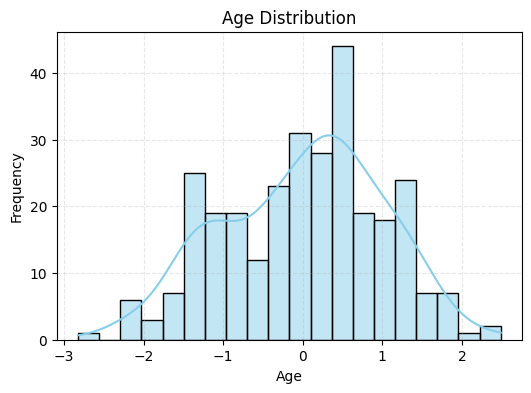

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


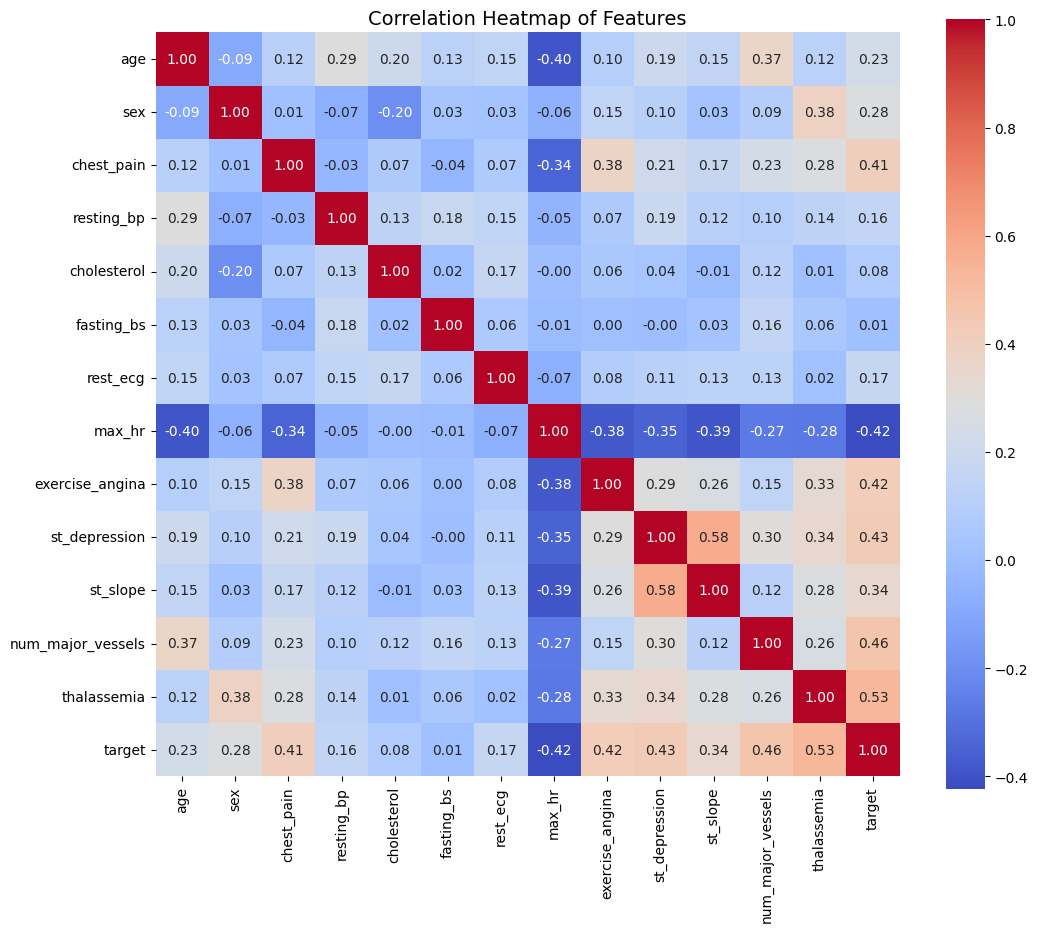

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features', fontsize=14)
plt.show()


<ipython-input-77-b9ed8a3d4870>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=df, palette='Set3')


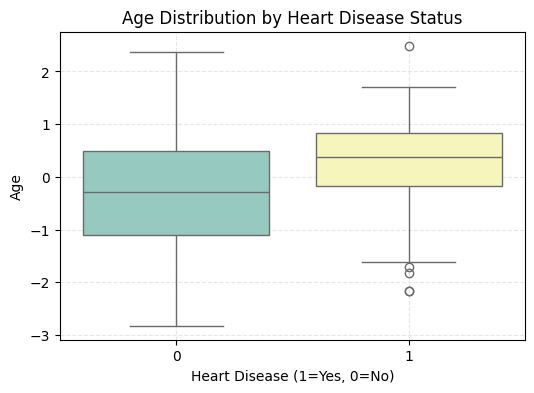

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='age', data=df, palette='Set3')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (1=Yes, 0=No)')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


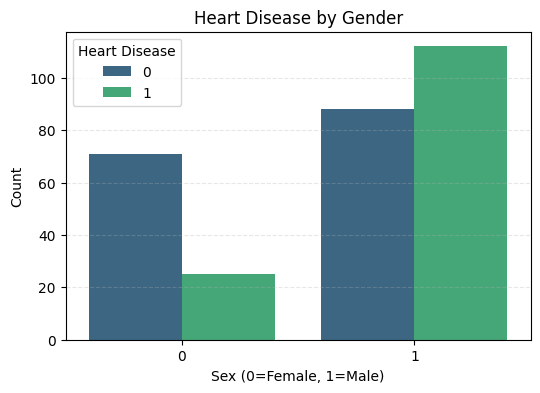

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df, palette='viridis')
plt.title('Heart Disease by Gender')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()
